In [25]:
from tqdm import tqdm
from collections import Counter

players = Counter()

max_lines = 10000000

with open('lichess_db_standard_rated_2022-07.pgn/lichess_db_standard_rated_2022-07.pgn') as f:
    for i, line in enumerate(tqdm(f)):
        max_lines -= 1
        if '[White ' in line or '[Black ' in line:
            players[line[8:-3]] += 1
        if not max_lines:
            break

len(players)

9999999it [00:12, 775590.94it/s]

197932


In [26]:
active_players = [player for player in players if players[player] >= 5]
len(active_players)

63939

In [76]:
medium_sample = active_players[:1000]
huge_sample = active_players[:12000]

In [77]:
import requests
from dataclasses import dataclass
from typing import Optional

@dataclass
class Player:
    name: str
    blitz_rating: Optional[int]
    blitz_games: Optional[int]
    rapid_rating: Optional[int]
    rapid_games: Optional[int]
    puzzle_rating: Optional[int]
    puzzle_games: Optional[int]
    

huge_players = []
    
s = requests.Session()

for i, name in enumerate(tqdm(huge_sample)):
    url = f'https://lichess.org/api/user/{name}'
    r = s.get(url)
    try:
        player = Player(r.json()['username'],
                        r.json()['perfs']['blitz']['rating'],
                        r.json()['perfs']['blitz']['games'],
                        r.json()['perfs']['rapid']['rating'],
                        r.json()['perfs']['rapid']['rating'],
                        r.json()['perfs']['puzzle']['rating'],
                        r.json()['perfs']['puzzle']['rating'])
        huge_players.append(player)
    except KeyError:
        pass

len(huge_players)

100%|██████████████████████████████████████████████████████████████████████████| 12000/12000 [1:15:28<00:00,  2.65it/s]


10061

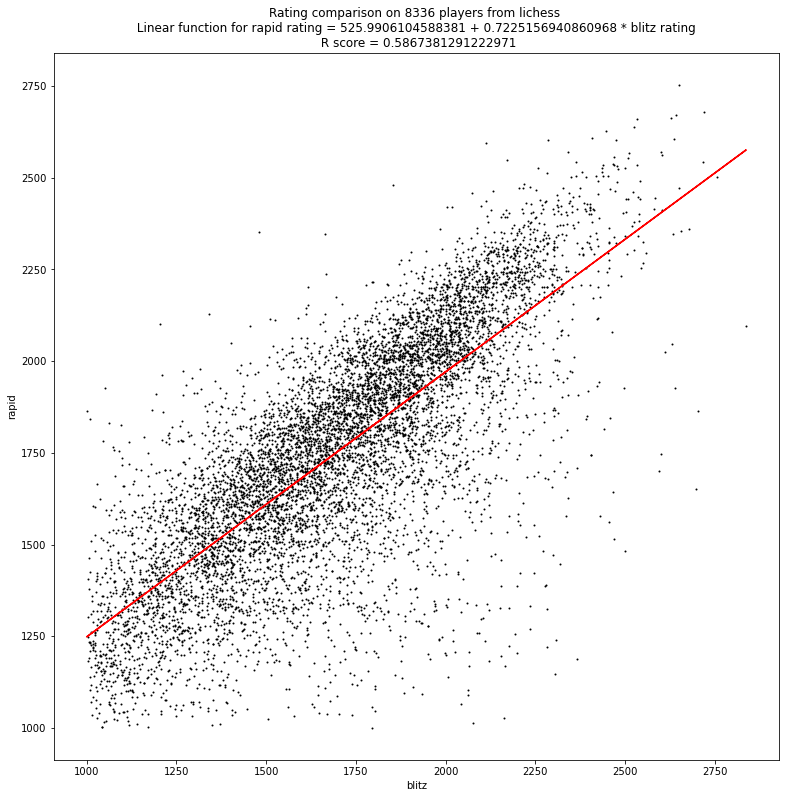

In [105]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

players_final = [p for p in huge_players if p.rapid_rating != 1500 and p.rapid_rating >= 1000 and p.blitz_rating != 1500 and p.blitz_rating >= 1000]

blitz_ratings = [player.blitz_rating for player in players_final]
rapid_ratings = [player.rapid_rating for player in players_final]
puzzle_ratings = [player.puzzle_rating for player in players_final]

X = np.array(blitz_ratings).reshape(-1, 1)
y = np.array(rapid_ratings)

lr = LinearRegression()
lr.fit(X, y)

rapid_predicted = lr.predict(X)

fig, ax = plt.subplots(figsize=(13, 13))

plt.scatter(blitz_ratings, rapid_ratings, c='black', s=1)
plt.plot(blitz_ratings, rapid_predicted, c='red')

ax.set_xlabel('blitz')
ax.set_ylabel('rapid')
ax.set_title(f'Rating comparison on {len(players_final)} players from lichess \n Linear function for rapid rating = {lr.intercept_} + {lr.coef_[0]} * blitz rating \n R score = {lr.score(X, y)}')

plt.show()

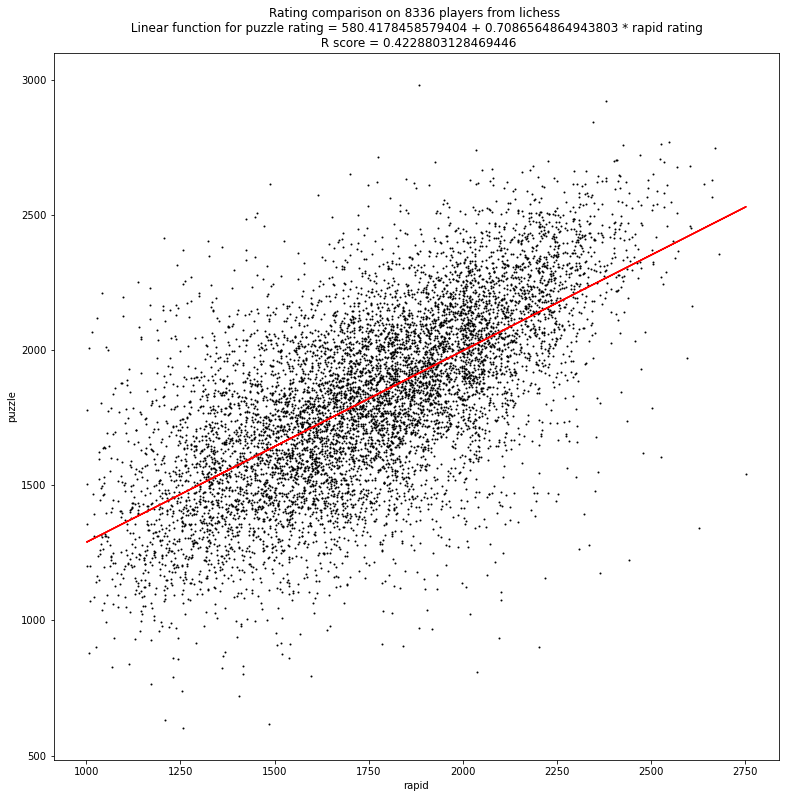

In [106]:
X = np.array(rapid_ratings).reshape(-1, 1)
y = np.array(puzzle_ratings)

lr = LinearRegression()
lr.fit(X, y)

puzzle_predicted = lr.predict(X)

fig, ax = plt.subplots(figsize=(13, 13))

plt.scatter(rapid_ratings, puzzle_ratings, c='black', s=1)
plt.plot(rapid_ratings, puzzle_predicted, c='red')

ax.set_xlabel('rapid')
ax.set_ylabel('puzzle')
ax.set_title(f'Rating comparison on {len(players_final)} players from lichess \n Linear function for puzzle rating = {lr.intercept_} + {lr.coef_[0]} * rapid rating \n R score = {lr.score(X, y)}')

plt.show()

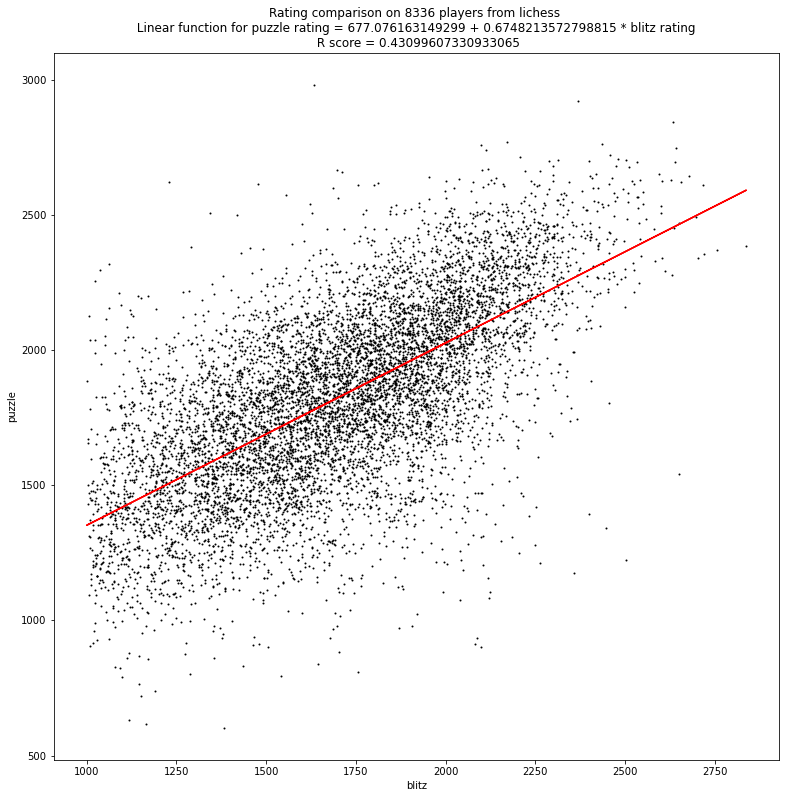

In [107]:
X = np.array(blitz_ratings).reshape(-1, 1)
y = np.array(puzzle_ratings)

lr = LinearRegression()
lr.fit(X, y)

puzzle_predicted = lr.predict(X)

fig, ax = plt.subplots(figsize=(13, 13))

plt.scatter(blitz_ratings, puzzle_ratings, c='black', s=1)
plt.plot(blitz_ratings, puzzle_predicted, c='red')

ax.set_xlabel('blitz')
ax.set_ylabel('puzzle')
ax.set_title(f'Rating comparison on {len(players_final)} players from lichess \n Linear function for puzzle rating = {lr.intercept_} + {lr.coef_[0]} * blitz rating \n R score = {lr.score(X, y)}')

plt.show()